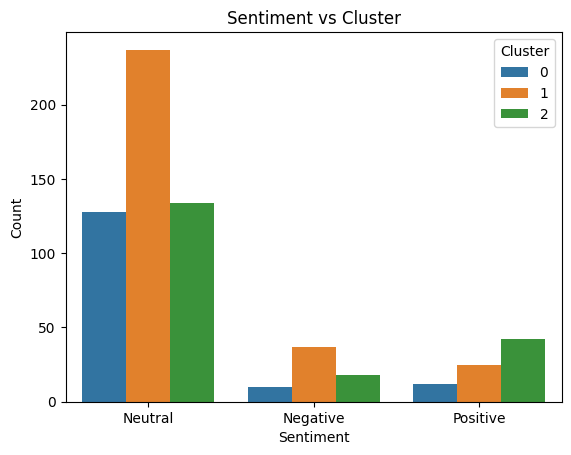

In [1]:
# Import necessary libraries
import sqlite3
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Function to fetch new messages from the SQLite database
def fetch_new_messages():
    conn = sqlite3.connect("messages.db")
    c = conn.cursor()
    c.execute("SELECT * FROM messages")
    rows = c.fetchall()
    conn.close()
    return rows

# Function to display the dynamic dashboard
def display_dashboard():
    while True:
        # Fetch the new messages and create a DataFrame
        data = fetch_new_messages()
        df = pd.DataFrame(data, columns=["date", "username", "sentiment", "message", "cluster"])

        # Clear the output and refresh the plot
        clear_output(wait=True)

        # Plot a count plot of sentiment vs cluster
        sns.countplot(data=df, x='sentiment', hue='cluster')
        plt.title('Sentiment vs Cluster')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.legend(title='Cluster', loc='upper right')
        plt.show()

        # Refresh the dashboard every 10 seconds
        time.sleep(10)

# Call the display_dashboard function to start displaying the dynamic dashboard
display_dashboard()